In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily
import geopandas
from random import shuffle
from shapely.geometry import Point
from sklearn.cluster import KMeans

non spatial cv

In [2]:
dane = pd.read_csv("dane.csv")
items = dane[["x", "y"]].values.tolist()

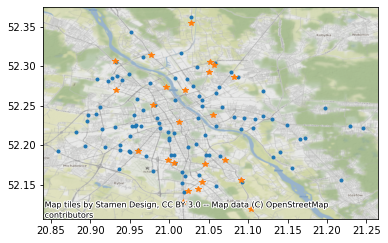

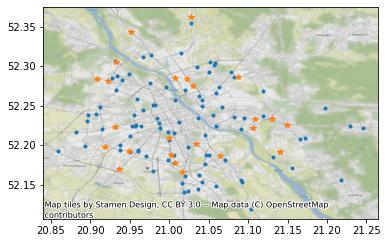

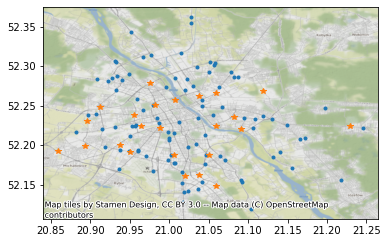

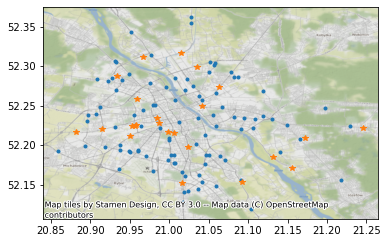

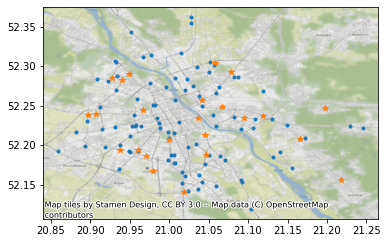

In [5]:
def k_fold_cross_validation(items, k, randomize=False):

    if randomize:
        items = list(items)
        shuffle(items)

    slices = [items[i::k] for i in range(k)]

    for i in range(k):
        validation = slices[i]
        training = [item
                    for s in slices if s is not validation
                    for item in s]
        yield training, validation

if __name__ == '__main__':
    #items = [[1,5],[3,7],[9,2],[3,5], [5,8], [2,5]] #range(97)
    for training, validation in k_fold_cross_validation(items, 5):
        for item in items:
            assert (item in training) ^ (item in validation)
        df_geometry= [Point(xy) for xy in training]
        df_train = geopandas.GeoDataFrame(training, geometry=df_geometry, crs='epsg:4326')

        df_geometry= [Point(xy) for xy in validation]
        df_test = geopandas.GeoDataFrame(validation, geometry=df_geometry, crs='epsg:4326')

        fig,ax=plt.subplots()
        ax.plot(df_train[0],df_train[1], '.')
        ax.plot(df_test[0],df_test[1], '*')
        contextily.add_basemap(ax, crs=df_train.crs.to_string())
        plt.show()

spatial cv

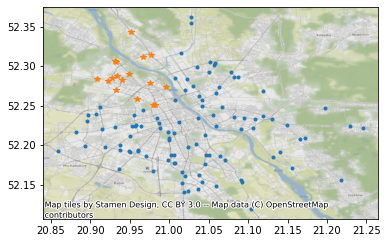

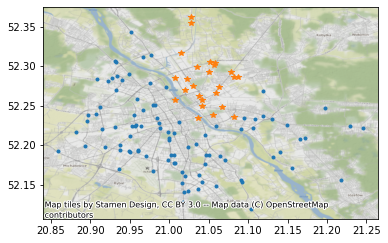

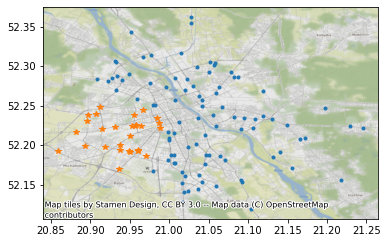

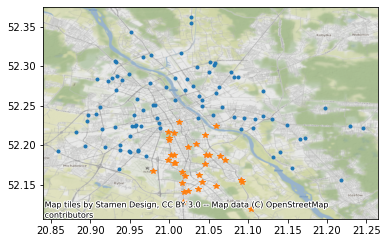

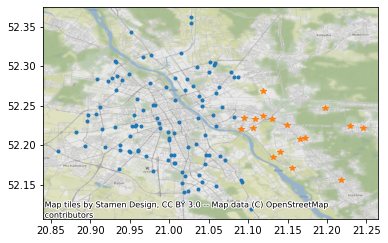

In [7]:
kmeans =  KMeans(init="random",
                    n_clusters=5,
                    n_init=10,
                    max_iter=300,
                    random_state=42)
kmeans.fit(items)

dane['kmeans_cluster'] = list(kmeans.labels_)

slices = [dane[dane.kmeans_cluster == 0][["x", "y"]].values.tolist(),
          dane[dane.kmeans_cluster == 1][["x", "y"]].values.tolist(),
          dane[dane.kmeans_cluster == 2][["x", "y"]].values.tolist(),
          dane[dane.kmeans_cluster == 3][["x", "y"]].values.tolist(),
          dane[dane.kmeans_cluster == 4][["x", "y"]].values.tolist()
         ]

def k_fold_cross_validation(items, k, randomize=False):

    if randomize:
        items = list(items)
        shuffle(items)

    #slices = 

    for i in range(k):
        validation = slices[i]
        training = [item
                    for s in slices if s is not validation
                    for item in s]
        yield training, validation

if __name__ == '__main__':
    #items = [[1,5],[3,7],[9,2],[3,5], [5,8], [2,5]] #range(97)
    for training, validation in k_fold_cross_validation(items, 5):
        for item in items:
            assert (item in training) ^ (item in validation)
        df_geometry= [Point(xy) for xy in training]
        df_train = geopandas.GeoDataFrame(training, geometry=df_geometry, crs='epsg:4326')

        df_geometry= [Point(xy) for xy in validation]
        df_test = geopandas.GeoDataFrame(validation, geometry=df_geometry, crs='epsg:4326')

        fig,ax=plt.subplots()
        ax.plot(df_train[0],df_train[1], '.')
        ax.plot(df_test[0],df_test[1], '*')
        contextily.add_basemap(ax, crs=df_train.crs.to_string())
        plt.show()